# Comparison of the electrical behavior of different agricultural management systems - MULTICOIL FDEM

This routine compares the EC response over time of 2 different plots of Sasse Rami farm, a conservative and a conventional managed. Data were collected with the CMD mini-explorer in HCP mode only.

![fig1.png](attachment:fig1.png)

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import sys
sys.path.append('../../../emagpy/src')
from emagpy import Problem

emdir = '../data/em/'
outputdir = '../figures/'

fnames = ['2017-12-19.csv',
          '2018-02-05.csv',
          '2018-03-14.csv',
          '2018-03-26.csv',
          '2018-04-26.csv']

In [0]:
kons = Problem()
kons.createTimeLapseSurvey([emdir + 'cons78/' + f for f in fnames[:5]])
kons.rollingMean(window=4)
# help(k.show)

konv = Problem()
konv.createTimeLapseSurvey([emdir + 'conv82/' + f for f in fnames[:5]])
konv.rollingMean(window=4)
# help(k.show)

dataset shrunk of 3 measurements
dataset shrunk of 3 measurements
dataset shrunk of 3 measurements
dataset shrunk of 3 measurements
dataset shrunk of 3 measurements
dataset shrunk of 3 measurements
dataset shrunk of 3 measurements
dataset shrunk of 3 measurements
dataset shrunk of 3 measurements
dataset shrunk of 3 measurements


### Conservative

Text(0.5, 1.05, 'Conservative 2')

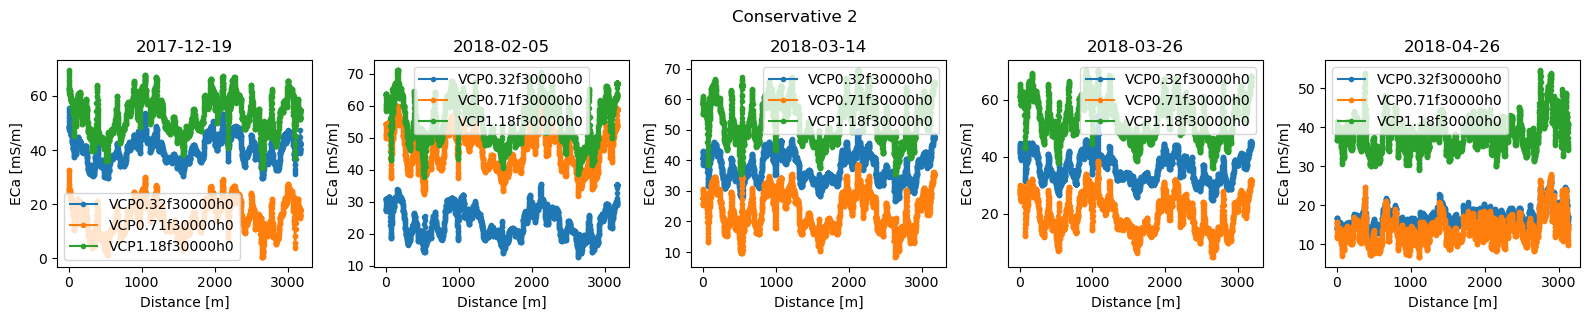

In [0]:
# show datasets - conservative
#plt.style.use('seaborn-deep')
plt.style.use('default')
fig, axs = plt.subplots(1, 5, figsize=(16,3))
axs = axs.flatten()
for i in range(5):
    ax = axs[i]
    kons.show(index=i, ax=ax)
    ax.set_title(kons.surveys[i].name[-11:])
fig.tight_layout()    
fig.suptitle('Conservative 2', y=1.05)

Text(0.5, 0.99, 'Conservative')

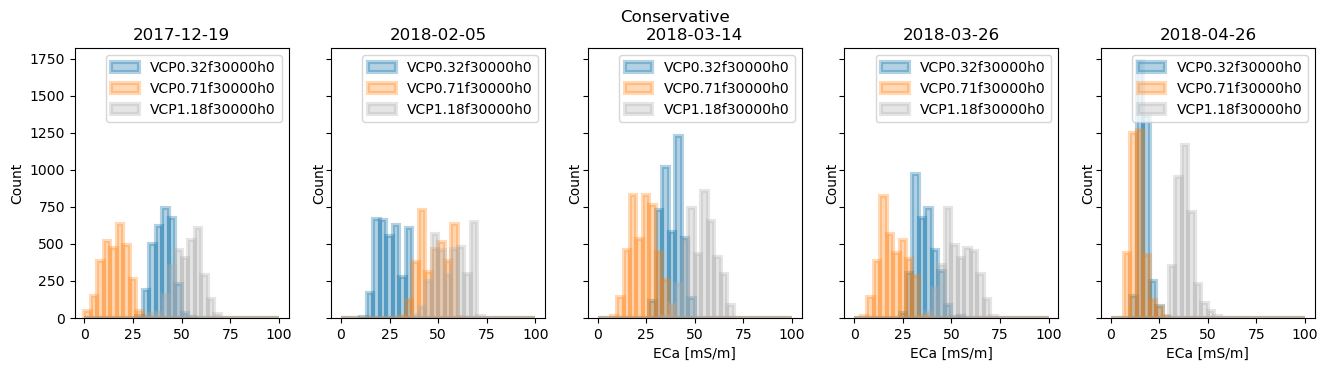

In [0]:
# conservative dataset
plt.style.use('tableau-colorblind10')

fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(16,3.5))
axs = axs.flatten()
for i in range(5):
    ax = axs[i]
    ax.set_title(kons.surveys[i].name)
    kons.showDist(index=i, ax=axs[i], nbins=30, vmin=0, vmax=100)
    if i > 1:
        ax.set_xlabel('ECa [mS/m]')
    else:
        ax.set_xlabel('')
fig.suptitle('Conservative', y=.99)        
#fig.savefig(outputdir + 'cons78-dist.jpg', dpi=300)

### Conventional

Text(0.5, 1.05, 'Conventional')

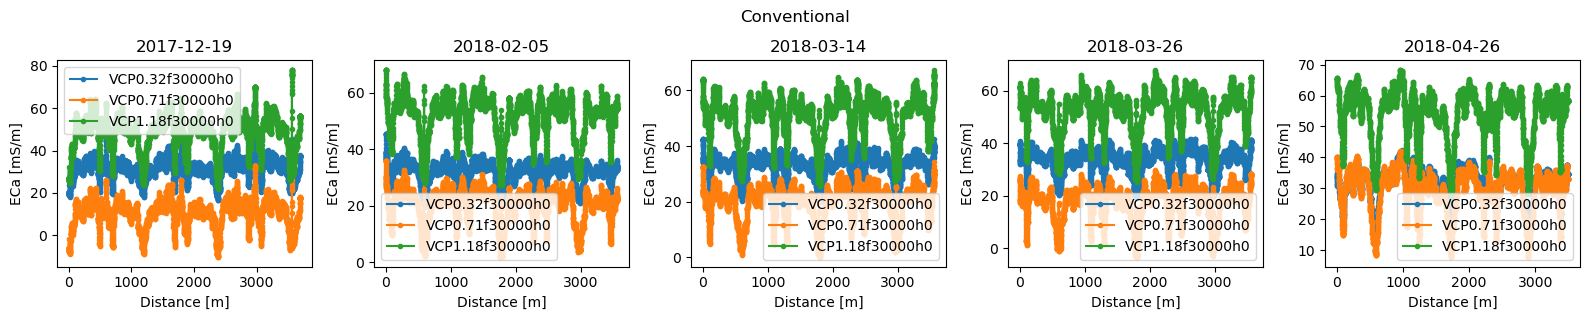

In [0]:
# show datasets - conventional
plt.style.use('default')
fig, axs = plt.subplots(1, 5, figsize=(16,3))
axs = axs.flatten()
for i in range(5):
    ax = axs[i]
    konv.show(index=i, ax=ax)
    ax.set_title(konv.surveys[i].name[-11:])
fig.tight_layout()    
fig.suptitle('Conventional', y=1.05)

Text(0.5, 0.99, 'Conventional')

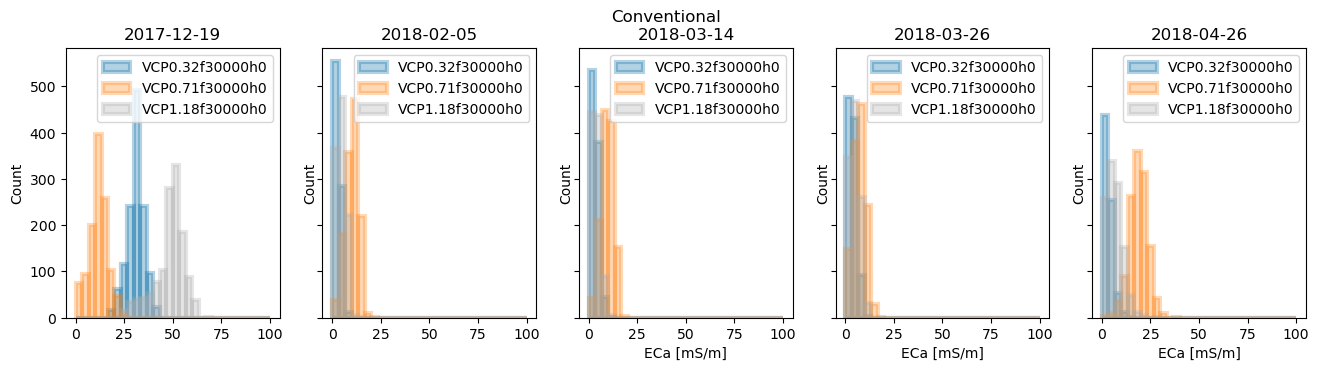

In [0]:
# conventional dataset
plt.style.use('tableau-colorblind10')
#from cycler import cycler
#mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#d62728', '#bcbd22', '#8c564b'])
#import seaborn as sns
#sns.set_palette("RdPu", 3)

fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(16,3.5))
axs = axs.flatten()
for i in range(5):
    ax = axs[i]
    ax.set_title(konv.surveys[i].name)
    konv.showDist(index=i, ax=axs[i], nbins=30, vmin=0, vmax=100)
    if i > 1:
        ax.set_xlabel('ECa [mS/m]')
    else:
        ax.set_xlabel('')
fig.suptitle('Conventional', y=.99)
#fig.savefig(outputdir + 'conv82-dist.jpg', dpi=300)

### Conservative - areal plot

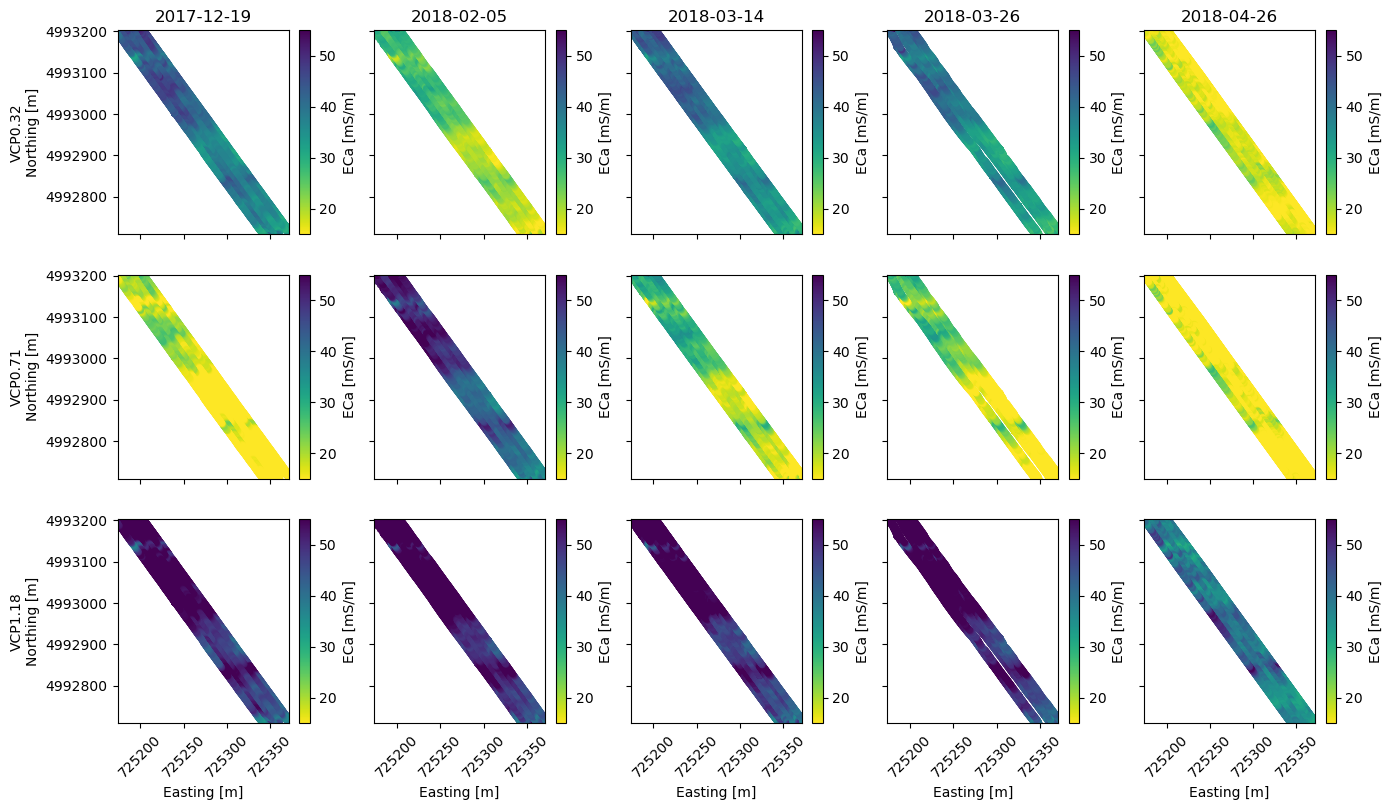

In [0]:
# plot areal surveys
fig, axs = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(16,9))
for i in range(5):
    for j, coil in enumerate(kons.coils):
        ax = axs[j,i]
        kons.showMap(index=i, coil=coil, ax=ax, vmin=15, vmax=55)
        #ax.set_aspect('equal')
        
        # cosmetic
        if i == 0:
            ax.set_ylabel(coil[:7] + '\nNorthing [m]')
        else:
            ax.set_ylabel('')
        if j == 0:
            ax.set_title(kons.surveys[i].name[-11:])
        else:
            ax.set_title('')
            
        #if j != 5:
            #fig.axes[-1].remove()
        if j == 2:
            ax.set_xlabel('Easting [m]')
            for tick in ax.get_xticklabels():
                tick.set_rotation(45)
        else:
            ax.set_xlabel('')

#fig.savefig(outputdir + 'cons78-eca-map.jpg', dpi=500)

In [0]:
# decimate a bit (optional)

#for s in kons.surveys:
    #s.df = s.df[::20]
#kons.interpData(surveyIndex=2)

In [0]:
# grid data and compute ECa variations
kons.gridData() # grid data on the same grid for all surveys
kons.computeApparentChange() # compute change in ECa compared to first survey

#for s in kons.surveys:
    #s.df = s.df[::20]
#kons.interpData(surveyIndex=2)

Trimming surveys and only keep common positions
Matching positions between surveys for time-lapse inversion...1366 in common...done in 0.147s
Computing relative ECa compared to background (1st survey).


Text(0.5, 0.99, 'Conservative')

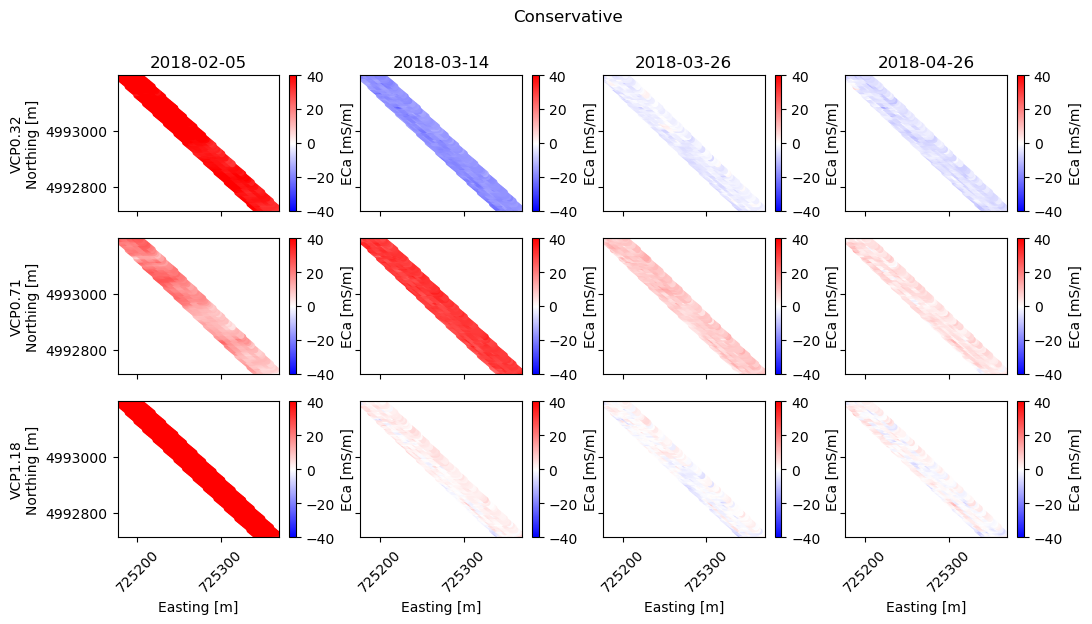

In [0]:
# differential variations over time in ECa - Conservative plot
fig, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,6))
for i in range(4):
    for j, coil in enumerate(kons.coils):
        ax = axs[j,i]
        kons.showMap(index=i, coil=coil, ax=ax, vmin=-40, vmax=40, cmap='bwr', contour=False)
        #ax.set_aspect('equal')
        
        # cosmetic
        if i == 0:
            ax.set_ylabel(coil[:7] + '\nNorthing [m]')
        else:
            ax.set_ylabel('')
        if j == 0:
            ax.set_title(kons.surveys[i+1].name[-11:])
        else:
            ax.set_title('')
            
        #if j != 5:
            #fig.axes[-1].remove()
        if j == 2:
            ax.set_xlabel('Easting [m]')
            for tick in ax.get_xticklabels():
                tick.set_rotation(45)
        else:
            ax.set_xlabel('')
fig.suptitle('Conservative', y=.99)
#fig.savefig(outputdir + 'cons-eca-diff.jpg', dpi=250)

NEED TO DECIMATE AND CONTROL THE DIFFERENCES COMPUTATION

### Conventional - areal plot

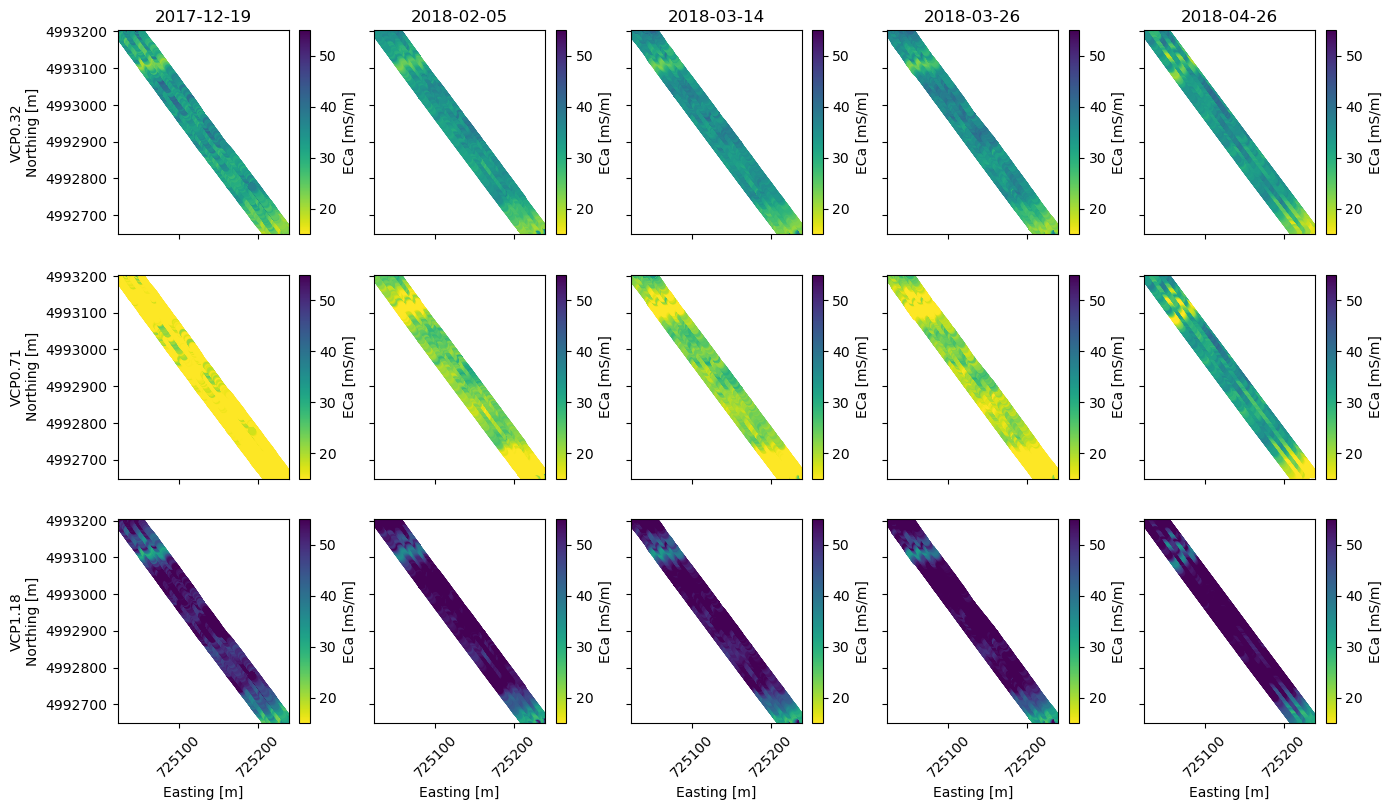

In [0]:
# plot areal surveys
fig, axs = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(16,9))
for i in range(5):
    for j, coil in enumerate(konv.coils):
        ax = axs[j,i]
        konv.showMap(index=i, coil=coil, ax=ax, vmin=15, vmax=55)
        #ax.set_aspect('equal')
        
        # cosmetic
        if i == 0:
            ax.set_ylabel(coil[:7] + '\nNorthing [m]')
        else:
            ax.set_ylabel('')
        if j == 0:
            ax.set_title(konv.surveys[i].name[-11:])
        else:
            ax.set_title('')
            
        #if j != 5:
            #fig.axes[-1].remove()
        if j == 2:
            ax.set_xlabel('Easting [m]')
            for tick in ax.get_xticklabels():
                tick.set_rotation(45)
        else:
            ax.set_xlabel('')
#fig.savefig(outputdir + 'conv-eca-map.jpg', dpi=500)

In [0]:
# decimate a bit (optional)

#for s in konv.surveys:
    #s.df = s.df[::20]
#konv.interpData(surveyIndex=2)

In [0]:
# grid data and compute ECa variations
konv.gridData() # grid data on the same grid for all surveys
konv.computeApparentChange() # compute change in ECa compared to first survey

#for v in konv.surveys:
    #v.df = v.df[::20]
#konv.interpData(surveyIndex=2)

Trimming surveys and only keep common positions
Matching positions between surveys for time-lapse inversion...1291 in common...done in 0.197s
Computing relative ECa compared to background (1st survey).


Text(0.5, 0.99, 'Conventional')

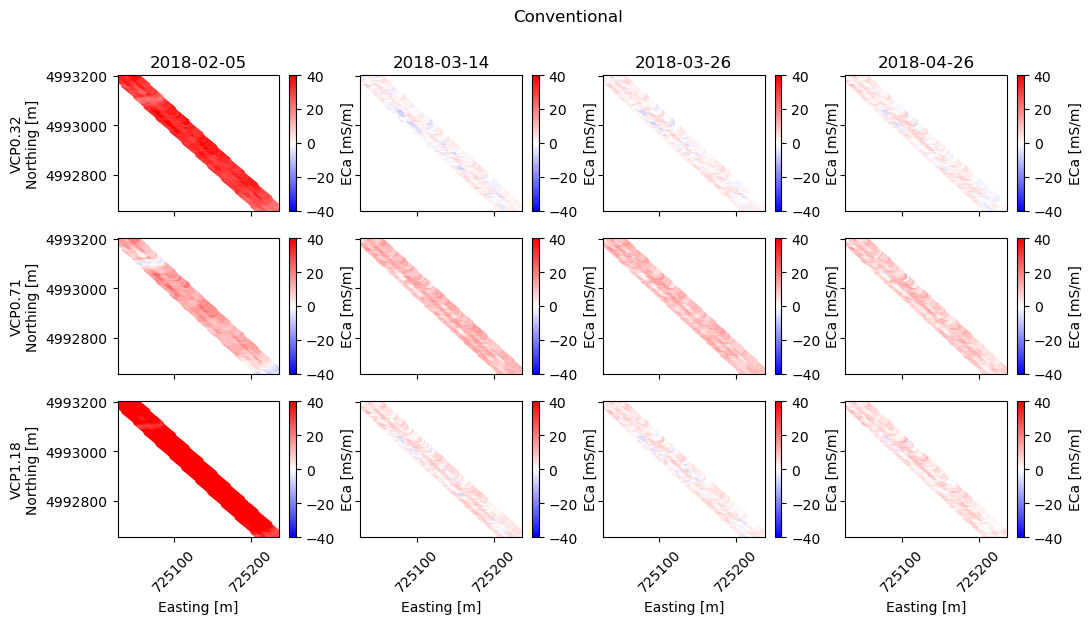

In [0]:
# differential variations over time in ECa - Conservative plot
fig, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,6))
for i in range(4):
    for j, coil in enumerate(konv.coils):
        ax = axs[j,i]
        konv.showMap(index=i, coil=coil, ax=ax, vmin=-40, vmax=40, cmap='bwr', contour=False)
        #ax.set_aspect('equal')
        
        # cosmetic
        if i == 0:
            ax.set_ylabel(coil[:7] + '\nNorthing [m]')
        else:
            ax.set_ylabel('')
        if j == 0:
            ax.set_title(konv.surveys[i+1].name[-11:])
        else:
            ax.set_title('')
            
        #if j != 5:
            #fig.axes[-1].remove()
        if j == 2:
            ax.set_xlabel('Easting [m]')
            for tick in ax.get_xticklabels():
                tick.set_rotation(45)
        else:
            ax.set_xlabel('')
fig.suptitle('Conventional', y=.99)
#fig.savefig(outputdir + 'conv-eca-diff.jpg', dpi=250)

NEED TO DECIMATE AND CONTROL THE DIFFERENCES COMPUTATION